In [1]:
import numpy as np
from earth import *
from matplotlib import pyplot as plt
from feedback_propogation_model import *
from feedforwards_propogation_model import *
from haversine import haversine
from INS_GNSS import *


## Task 1: Observation Model
For this assignment, two observation models are implemented. The first being a feedback architecture, where the state space includes LLA, RPY, VNED, Gyroscope bias, and Accelerometer bias. The second substitutes the two bias's for an LLA error.

I chose to implement the two observation models as function, labeled `feedback_propogation_model`and `feedforwards_propogation_model`. They both undergo the following steps:

1. Update the attitude based on the previous state and gyroscope measurements. For the feedback model, take into account the gyroscope error.
2. Update the velocity given the previous state, the new attitude, and acceleration measurements. For the feedback model, take into account the accelerometer error.
3. Update the position given the previous state and new velocity.
4. Return new states with previous error or bias terms.

While this observation model is accurate, the state will drift overtime if we do not incorporate new information about the systems states, which we recieve in the form of LLA and VNED measurements

## Task 2/3: Nonlinear KF Implementation
In order to fuse measurements with our propogation model, an unscented kalman filter was chosen. My filter is implemented directley into my `execute_feedforwards` and `execute_feedback` methods, while calling `getSigmaPoints` and `measurement_model` functions.

My UKF does the following at each time step:

1. Calculates sigma points and weights with getSigmaPoints according to the current state x and the state variance P. This function uses the following constants: alpha = 0.001, k = 1, beta = 2.

2. Propogates all sigma points through the nonlinear state transition model state_transition.

3. After propogating the sigma points, we recover the mean and variance

4. Again using getSigmaPoints, we calculate new sigma points with the new mean x and variance P

5. We then progogate these new sigma points through the measurement model measurement_model, and recover the mean and variance.

6. Compute the cross variance between measurement and propogated state, and eventally compute the kalman gain K.

7. With the Kalman gain we can update the estimate and variance. Completing the UKF for this timestep.



In [2]:
a = INS_GNSS('trajectory_data.csv')

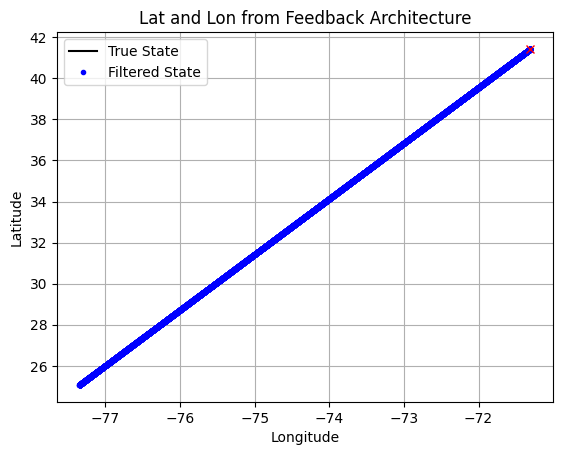

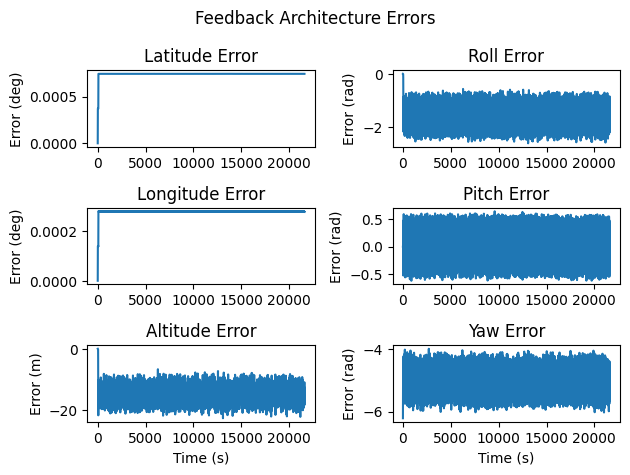

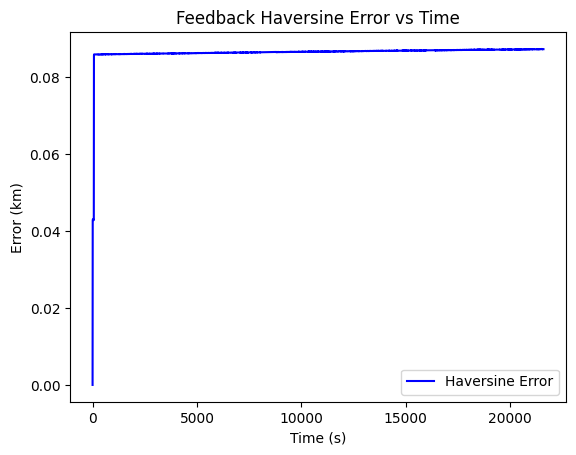

In [3]:
a.execute_feedback(debug=False)
a.make_fb_plots()

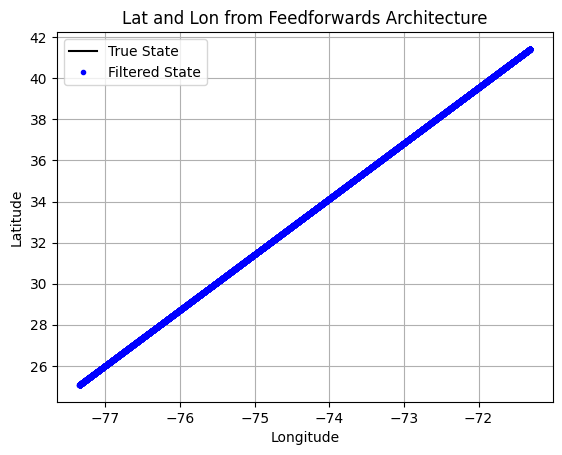

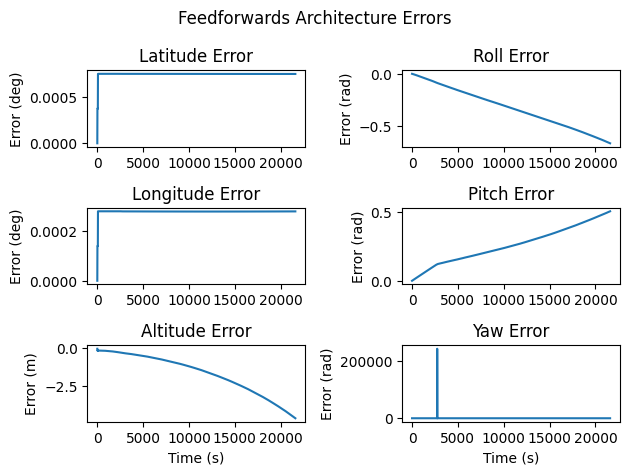

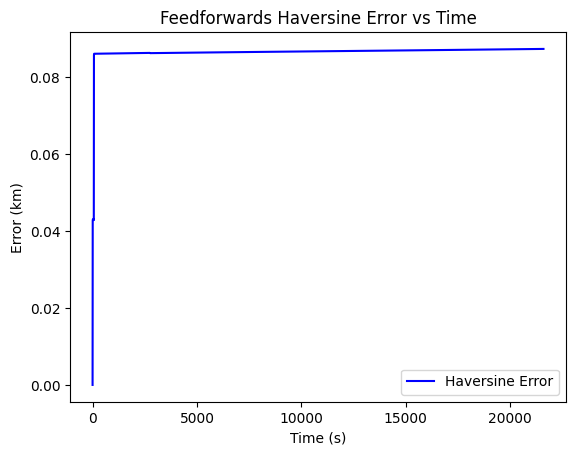

In [4]:
a.execute_feedforwards(debug=False)
a.make_ff_plots()